# Équation Différentielles et Interactions Écologiques

In [1]:
# Commençons par importer les outils dont nous aurons besoin. 
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
%matplotlib inline

# Une histoire de compétition.   

Soit deux espèces en compétition: deux espèces de poissons dans un lac, deux espèces de bactéries dans un intestin humain, deux graminées dans une prairie. Quelles sont les conditions sous lesquelles l'une pousse l'autre à l'extinction ? 

*Exercice: Modéliser ce système*

Il existe toute une classe de modèles permettant de rendre compte de l'évolution d'un certain nombre de grandeurs dans le temps et qui sont assez simple à écrire et à simuler: les systèmes d'équations diffèrentielles du premier ordre. 

 - Ces modèles sont **déterministes**. Ils font partie de la famille des [systèmes dynamiques](https://fr.wikipedia.org/wiki/Syst%C3%A8me_dynamique) 
 - Ces modèles sont en **temps continu**, les trajectoires sont définies sur un-sous ensemble de $\mathbb R$.
 - Ces modèles sont **non spatialisés**, on parle (peut être abusivement) de **modèle de champ moyen** (mean field models). L'espace d'état est de la forme $\mathbb R^N$, les grandeurs ne sont pas entières parceque l'on regarde la densité moyennes (en individus par unité de volume).
 - Ils peuvent être **autonomes** ou non. Nous allons commencer par un système autonome.

## Construction du modèle 

On commence par une seule espéce. On fait un bilan démographique sur une durée de controle $\Delta_t$

\begin{align}
\text{Variation de la population sur } \Delta_t &= + \text{Individus ajoutés à la population durant } 
\Delta_t -  \text{Individus retirés de la population durant } \Delta_t \\
&= \text{naissances} - \text{décès} + \text{immigration} - \text{émigration}
\end{align}

- *Hypothèse H1*: On considère un modèle de champ moyen. L'espace d'état est $\mathbb R$. 
- *Hypothèse H2*: Il n'y a pas de mouvement migratoires.
- *Hypothèse H3*: Les taux de naissance per capita $b$ et de taux de mort per capita $m$ sont constants. 

On écrit le système dynamique suivant: 

$$(S1) : \frac{dN}{dt} = bN - mN$$

Que l'on peut réécrire avec $r:=b-m$:

$$(S1) : \frac{dN}{dt} = rN $$

- La **variables d'état** de ce modèle est la densité d'individus $N \in \mathbb R$

- La **trajectoire** du système est la suite $(N_t)_{t\in \mathbb R}$ qui désigne la densité d'individus aux temps $t$. 

- Le **paramètre** de ce modèle est le taux d'accroissement $r$.

Dans le cas d'un modèle ODE du premier ordre autonome, on dispose de plusieurs outils pour représenter le comportement du modèle. Ils sont de plus en plus synthétiques (mais aussi de plus en plus couteux à établir). Dans l'ordre:

![](dynamical_systems.svg)

- Le tracé d'une **trajectoire** donne l'état du système au cours du temps pour *certaines* valeurs de paramètres et *certaines* conditions initiales. Pour le tracer il suffit d'intégrer l'ODE. 
- Le tracé du **diagramme de phase** donne le comportement qualitatif du système pour *certaines* valeurs de paramètres, mais **toutes** conditions initiales. Pour le tracer, il faut chercher les isoclines zéro et les points d'équilibre.
- Le tracé du **diagramme de bifurcation** donne la position et la nature des équilibre du système pour (potentiellement) **toutes** valeurs de paramètres, et **toutes** conditions initiales.

# Intégration numérique

Soit le système dynamique $(S)$ et une condition initiale $(N_0,P_0)$ définissant un *Problème de Cauchy*. Résoudre numériquement ce problème revient à calculer la trajectoire $(N_t,P_t)_{t\in t_0...t_f}$. 

### Résoudre numériquement une Équation différentielle ordinaire. 

Soit le problème de Cauchy suivant: 
\begin{align}
\begin{cases}
\mathbf{y}'(t) = f(\mathbf{y}(t))\\ 
\mathbf{ y }(0)= \mathbf{ y_0}\\ 
\end{cases}
\end{align}

On cherche à tracer la trajectoire, c.à.d la courbe $\left(t,\mathbf{y}(t)\right)_{t\in[0,T]}$. (Encore une fois je vous renvoie à votre cours de math pour les définitions rigoureuses de problème de Cauchy et de solution d'un problème de Cauchy). 


Si on connait la valeur de $\mathbf{y}$ au temps $t$ et que l'on veut connaitre sa valeur au temps $t+\Delta_t$:
\begin{align}
\int_t^{t+\Delta_t} \mathbf{y}'(s)ds &= \int_t^{t+\Delta_t} f(\mathbf{y}(s))ds\\ 
\mathbf{y}(t+\Delta_t) - \mathbf{y}(t)  &= \int_t^{t+\Delta_t} f(\mathbf{y}(s)ds)\\
\mathbf{y}(t+\Delta_t) &= \mathbf{y}(t) + \int_t^{t+\Delta_t} f(\mathbf{y}(s)ds)
\end{align}

Il nous faut intégrer $f$ entre $y(t)$ et $y(t+\Delta_t)$. 

La méthode des rectangles est un classique pour intégrer numériquement une fonction:

![Méthode des rectangles](data:image/svg+xml,%3Csvg%0A%20%20%20xmlns%3Adc%3D%22http%3A//purl.org/dc/elements/1.1/%22%0A%20%20%20xmlns%3Acc%3D%22http%3A//creativecommons.org/ns%23%22%0A%20%20%20xmlns%3Ardf%3D%22http%3A//www.w3.org/1999/02/22-rdf-syntax-ns%23%22%0A%20%20%20xmlns%3Asvg%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3Asodipodi%3D%22http%3A//sodipodi.sourceforge.net/DTD/sodipodi-0.dtd%22%0A%20%20%20xmlns%3Ainkscape%3D%22http%3A//www.inkscape.org/namespaces/inkscape%22%0A%20%20%20width%3D%2294.664589mm%22%0A%20%20%20height%3D%22106.77828mm%22%0A%20%20%20viewBox%3D%220%200%2094.664589%20106.77828%22%0A%20%20%20version%3D%221.1%22%0A%20%20%20id%3D%22svg8%22%0A%20%20%20inkscape%3Aversion%3D%220.92.0%20r15299%22%0A%20%20%20sodipodi%3Adocname%3D%22rectangle.svg%22%3E%0A%20%20%3Cdefs%0A%20%20%20%20%20id%3D%22defs2%22%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22StopL%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22StopL%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4712%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C5.65%20V%20-5.65%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-opacity%3A0.75%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22scale%280.8%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%3C/defs%3E%0A%20%20%3Csodipodi%3Anamedview%0A%20%20%20%20%20id%3D%22base%22%0A%20%20%20%20%20pagecolor%3D%22%23ffffff%22%0A%20%20%20%20%20bordercolor%3D%22%23666666%22%0A%20%20%20%20%20borderopacity%3D%221.0%22%0A%20%20%20%20%20inkscape%3Apageopacity%3D%220.0%22%0A%20%20%20%20%20inkscape%3Apageshadow%3D%222%22%0A%20%20%20%20%20inkscape%3Azoom%3D%222.8%22%0A%20%20%20%20%20inkscape%3Acx%3D%22149.91214%22%0A%20%20%20%20%20inkscape%3Acy%3D%22133.95329%22%0A%20%20%20%20%20inkscape%3Adocument-units%3D%22mm%22%0A%20%20%20%20%20inkscape%3Acurrent-layer%3D%22layer1%22%0A%20%20%20%20%20showgrid%3D%22false%22%0A%20%20%20%20%20inkscape%3Awindow-width%3D%221366%22%0A%20%20%20%20%20inkscape%3Awindow-height%3D%22752%22%0A%20%20%20%20%20inkscape%3Awindow-x%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-y%3D%2216%22%0A%20%20%20%20%20inkscape%3Awindow-maximized%3D%221%22%0A%20%20%20%20%20fit-margin-top%3D%220%22%0A%20%20%20%20%20fit-margin-left%3D%220%22%0A%20%20%20%20%20fit-margin-right%3D%220%22%0A%20%20%20%20%20fit-margin-bottom%3D%220%22%0A%20%20%20%20%20showborder%3D%22true%22%20/%3E%0A%20%20%3Cmetadata%0A%20%20%20%20%20id%3D%22metadata5%22%3E%0A%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%3Ccc%3AWork%0A%20%20%20%20%20%20%20%20%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3Eimage/svg%2Bxml%3C/dc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atype%0A%20%20%20%20%20%20%20%20%20%20%20rdf%3Aresource%3D%22http%3A//purl.org/dc/dcmitype/StillImage%22%20/%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atitle%20/%3E%0A%20%20%20%20%20%20%3C/cc%3AWork%3E%0A%20%20%20%20%3C/rdf%3ARDF%3E%0A%20%20%3C/metadata%3E%0A%20%20%3Cg%0A%20%20%20%20%20inkscape%3Alabel%3D%22Layer%201%22%0A%20%20%20%20%20inkscape%3Agroupmode%3D%22layer%22%0A%20%20%20%20%20id%3D%22layer1%22%0A%20%20%20%20%20transform%3D%22translate%28-10.07026%2C-4.0684521%29%22%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.75%3Bfill%3A%2300ff00%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23008000%3Bstroke-width%3A0.71305209%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539-2-9%22%0A%20%20%20%20%20%20%20width%3D%2246.113094%22%0A%20%20%20%20%20%20%20height%3D%220.37797162%22%0A%20%20%20%20%20%20%20x%3D%2225.702381%22%0A%20%20%20%20%20%20%20y%3D%2298.562492%22%20/%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.4510002%3Bfill%3A%2300ff00%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23008000%3Bstroke-width%3A0.71305209%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539-2%22%0A%20%20%20%20%20%20%20width%3D%2246.113094%22%0A%20%20%20%20%20%20%20height%3D%2234.206844%22%0A%20%20%20%20%20%20%20x%3D%2225.702379%22%0A%20%20%20%20%20%20%20y%3D%2218.242558%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2025.702381%2C4.0684521%20V%2098.562495%22%0A%20%20%20%20%20%20%20id%3D%22path4525%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2071.815475%2C4.8244045%20V%2098.940476%22%0A%20%20%20%20%20%20%20id%3D%22path4527%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A6.61458302px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2243.278271%22%0A%20%20%20%20%20%20%20y%3D%22110.84673%22%0A%20%20%20%20%20%20%20id%3D%22text4531%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4537%22%0A%20%20%20%20%20%20%20%20%20x%3D%2243.278271%22%0A%20%20%20%20%20%20%20%20%20y%3D%22110.84673%22%3E%CE%94t%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A6.61458302px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2269.16964%22%0A%20%20%20%20%20%20%20y%3D%22108.0119%22%0A%20%20%20%20%20%20%20id%3D%22text4535%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4533%22%0A%20%20%20%20%20%20%20%20%20x%3D%2269.16964%22%0A%20%20%20%20%20%20%20%20%20y%3D%22114.06838%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%20/%3E%3C/text%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.75%3Bfill%3A%23ffaaaa%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23ff0000%3Bstroke-width%3A0.71305203%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539%22%0A%20%20%20%20%20%20%20width%3D%2246.113091%22%0A%20%20%20%20%20%20%20height%3D%2245.735119%22%0A%20%20%20%20%20%20%20x%3D%2225.702381%22%0A%20%20%20%20%20%20%20y%3D%2252.449402%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23StopL%29%3Bmarker-end%3Aurl%28%23StopL%29%22%0A%20%20%20%20%20%20%20d%3D%22M%2071.815475%2C101.58632%20H%2026.133928%22%0A%20%20%20%20%20%20%20id%3D%22path4541%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000ff%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2021.355654%2C60.197916%20C%2041.684294%2C12.229184%2074.914882%2C19.738826%20104.62744%2C12.120929%22%0A%20%20%20%20%20%20%20id%3D%22path4523%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A5.11545563px%3Bline-height%3A3.19715953px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%230000ff%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%229.9528646%22%0A%20%20%20%20%20%20%20y%3D%2248.673073%22%0A%20%20%20%20%20%20%20id%3D%22text7293%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan7291%22%0A%20%20%20%20%20%20%20%20%20x%3D%229.9528646%22%0A%20%20%20%20%20%20%20%20%20y%3D%2248.673073%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%230000ff%3Bstroke-width%3A0.26458332px%22%3Ef%28y%28t%29%29%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A5.11545563px%3Bline-height%3A3.19715953px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%230000ff%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2272.312927%22%0A%20%20%20%20%20%20%20y%3D%2211.716307%22%0A%20%20%20%20%20%20%20id%3D%22text7293-4%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan7291-8%22%0A%20%20%20%20%20%20%20%20%20x%3D%2272.312927%22%0A%20%20%20%20%20%20%20%20%20y%3D%2211.716307%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%230000ff%3Bstroke-width%3A0.26458332px%22%3Ef%28y%28t%2B%CE%94t%29%29%3C/tspan%3E%3C/text%3E%0A%20%20%3C/g%3E%0A%3C/svg%3E)


L'aire du rectangle rouge est une approximation de $\int_t^{t+\Delta_t} f(\mathbf{y}(t))$. Cette méthode de résolution de l'ODE est appelée méthode d'Euler explicite. Si on prend le grand rectangle vert, il est necessaire de résoudre une équation pour calculer  $y(t+\Delta_t)$. On parle de méthode d'Euler implicite.

In [2]:
# Écrivez une fonction euler_explicite(y0, r, dt, T) qui simule la trajectoire 
# du système S1 en utilisant l'aire du rectangle rouge.

In [3]:
def euler_explicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler explicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    pass

In [4]:
def euler_explicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler explicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    y = np.zeros(int(T/dt))
    y[0] = y0
    for n in range(int(T/dt)-1):
        y[n+1] = y[n] * (1+dt*r) # y[n] + le rectangle rouge.
    return y

In [5]:
# Tracez la trajectoire pour les paramètres suivants:
# y0 = 1, r = 1, T = 10, dt = 0.1
# y0 = 100, r = -0.5, T = 10, dt = 1
# y0 = 100, r = -0.5, T = 50, dt = 10
# Que remarquez-vous ?
# Comparez avec la solution analytique.

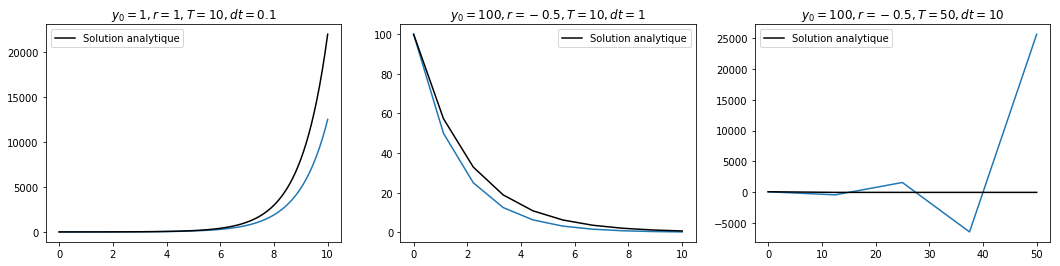

In [6]:
conditions = [(1,1,0.1,10),
              (100,-0.5,1,10),
              (100,-0.5,10,50)]
fig, axes = plt.subplots(1,len(conditions), figsize=(len(conditions)*6,4))
for ax,(y0,r,dt,T) in zip(axes,conditions):
    ax.set_title(r"$y_0={}, r={}, T={}, dt={}$".format(y0, r, T, dt))
    tspace = np.linspace(0,T,int(T/dt))
    ax.plot(tspace, euler_explicite(y0,r,dt,T))
    ax.plot(tspace, y0*np.exp(r*tspace), color='k', label='Solution analytique')
    ax.legend()

[Text(0, 0.5, 'Population size'), Text(0.5, 0, 'Time')]

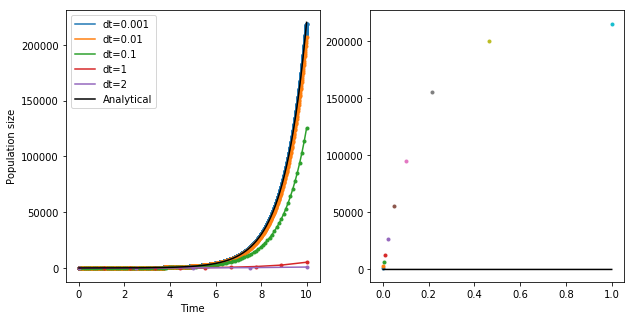

In [7]:
dtspace = np.logspace(1,-3)
erreur = []
T = 10
r = 1
y0 = 10
fig,ax = plt.subplots(1,2,figsize=(10,5))
for dt in [0.001, 0.01,0.1,1,2]:
    tspace = np.linspace(0,T,int(T/dt))
    y = euler_explicite(y0,r,dt,T)
    ax[0].plot(tspace, y, label='dt={}'.format(dt))
    ax[0].scatter(tspace, y, marker='.')

dtspace = np.logspace(-3,0,10)
for dt in dtspace:
    tspace = np.linspace(0,T,int(T/dt))
    y = euler_explicite(y0,r,dt,T)
    ax[1].scatter(dt, abs(y0*np.exp(r*T)-y[-1]), marker='.', label='dt={}'.format(dt))
ax[1].plot(dtspace,dtspace, color='k')
tspace = np.linspace(0,T,1000)
ax[0].plot(tspace,y0*np.exp(r*tspace), color='k', label='Analytical')
ax[0].legend()
ax[0].set(xlabel='Time', ylabel='Population size')

In [8]:
# (*) Écrivez une fonction euler_implicite(y0, r, dt, T) qui simule la trajectoire du système S2
# en utilisant l'aire du rectangle vert.
# Comparez les résultats avec la méthode précédente. 

In [9]:
def euler_implicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler implicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    pass

In [10]:
def euler_implicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler implicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    y = np.zeros(T//dt)
    y[0] = y0
    for n in range(T//dt-1):
        y[n+1] = y[n] * 1/(1-dt*r) #y[n] + le rectangle vert.
    return y

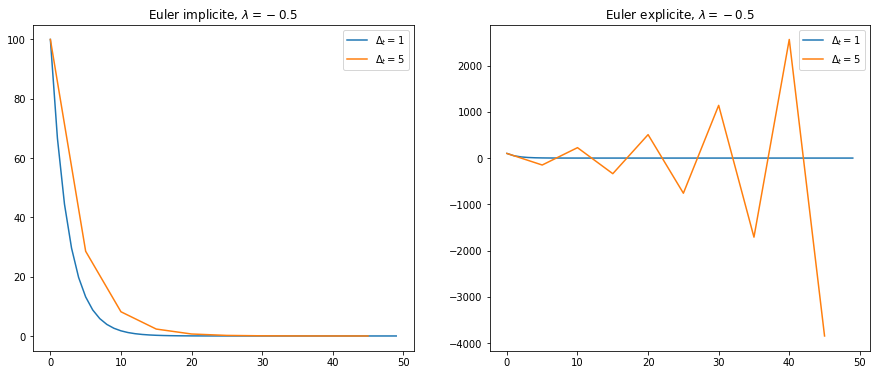

In [11]:
y0 = 100
T = 50
lbda = -.5
fig, axes = plt.subplots(1,2,figsize=(15,6))
for ax, label, integrator in ((axes[0],'implicite',euler_implicite), (axes[1], 'explicite',euler_explicite)):
    for dt in [1,5]:
        ax.plot(np.arange(0,T,dt),
                integrator(y0,lbda,dt,T),
                label='$\Delta_t = {}$'.format(dt))
    ax.set(title = 'Euler {}, $\lambda = {}$'.format(label,lbda))
    ax.legend()

### Apparté: Stabilité des solutions numériques 

On prend $\lambda < 0$ et $y_0 > 0$. Alors $y(t)$ est positive et tend vers $0$. 

Cependant, certaines méthodes numériques peuvent présenter des **instabilités** et tendre tout de même vers des valeurs infinies. C'est le cas de la méthode d'Euler explicite pour certains choix de pas de temps:

\begin{align}
y_{n+1} &= y_n + \Delta_t \lambda y_n\\
y_{n+1} &= (1+\Delta_t\lambda)  y_n\\
y_{n} &= (1+\Delta_t\lambda)^n  y_0
\end{align}

Or si $\left |1+\Delta_t\lambda \right|>1$, alors $\lim_{n \to \infty}(1+\Delta_t\lambda)^n$ diverge.

Comme $\Delta_t>0$ et $\lambda<0$, si on prend $\Delta_t > -\frac{2}{\lambda}$, la solution sera instable. 

Les méthodes implicites sont moins sensibles à ces problèmes (mais plus couteuses en calculs):

\begin{align}
y_{n+1} = y_n + \Delta_t \lambda y_{n+1}\\
y_{n} = (1-\Delta_t\lambda)  y_{n+1}\\
y_{n} = \left ( \frac{1}{1-\Delta_t\lambda} \right )^n  y_0
\end{align}

Si $\lambda<0$, la méthode est stable $\forall \Delta_t > 0$. Elle ne prendra jamais de valeur infinie quelque soit le pas de temps choisi. 

Cette méthode est également d'ordre 2: l'erreur à un temps donné est de $O(\Delta_t^2)$. Réduire $\Delta_t$ améliore donc toujours la précision. 

#### Autres méthodes d'intégration

Il existe de nombreuses méthodes d'intégration. Une méthode classique est celle de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). Dans la suite nous utiliserons le solveur de `scipy` qui implémente des méthodes plus complexes ([LSM](https://en.wikipedia.org/wiki/Linear_multistep_method) et [BDS](https://en.wikipedia.org/wiki/Backward_differentiation_formula)) mais fondées sur les mêmes principes. 

Un bon solveur d'ODE est compliqué à implémenter et je vous encourage à utiliser celui ci. Même dans des cas très simples (voir annexe) la méthode d'Euler explicite peut réserver des surprises. 

# Introduire la densité dépendance

On ajoute l'hypothèse H3: 

- *Hypothèse H3'*: Le terme de mort n'est pas constant mais augmente avec la densité des individus à cause de la surpopulation. Cette augmentation est linéaire. En chimie on dit que la cinétique est gouvernée par la **loi d'action de masse** (on imagine des individus bien mélangés). En écologie on parle de réponse fonctionelle de Holling de type 1 (linéaire). 

Quelle est la nouvelle forme du système ? 

$$ (S2) :  
\frac{dN}{dt} = ??? $$

On a toujours: $$\frac{dN}{dt} = b(N) - m(N) $$

Ici le taux de naissance est linéaire $b(N) = rN$ (c'est à dire constant per capita) et le taux de mort est $m(N) = r\frac{N^2}{K}$ (c'est à dire linéaire per capita). Ce qui donne:

$$(S2) :  
\frac{dN}{dt} : rN (1 - \frac{N}{K}) $$

In [12]:
# Simulez une trajectoire de ce modèle et représentez là sous forme de graphe.
# Utilisez scipy.integrate, partial, np.linspace, plt.plot.

In [13]:
def logistique(N, t, r, K):
    """Flot du modèle de croissance logistique.
    Args:
       N (float): Population of predator and preys.
       t (float): time (unused)
       r (float): taux d'accroissement.
       K (float): Capacité biotique
    Return: dx/dt
    """
    pass

In [14]:
def logistique(N, t, r, K):
    """Dérivée temporelle du modèle de croissance logistique.
    Args:
       N (float): Population of predator and preys.
       t (float): time (unused)
       r (float): taux d'accroissement.
       K (float): Capacité biotique
    Return: dx/dt
    """
    return r * N * (1 - N/K)

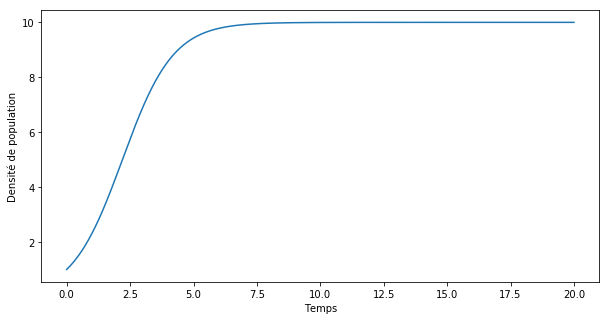

In [15]:
# On créé une liste des temps pour lequel on va intégrer le système. 
temps = np.linspace(0,20,1500) 

# On utilise functools.partial pour définir l'application partielle de la fonction
# logistique ou les paramètres sont fixés.
K = 10
r = 1
derivative = partial(logistique, r=r, K=K)

# On définit les conditions initiales.
conditions_initiales = 1

# Avec ces trois éléments on peut utiliser le solveur de scipy.
# Celui ci renvoie un np.array de taille len(time) par len(condition_initiale)
trajectoire = scipy.integrate.odeint(derivative,
                                     y0=conditions_initiales,
                                     t=temps)

# On affiche cette trajectoire à l'aide de matplotlib.
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(temps,trajectoire)
ax.set(xlabel='Temps',ylabel='Densité de population', label='Trajectoire')
plt.show()

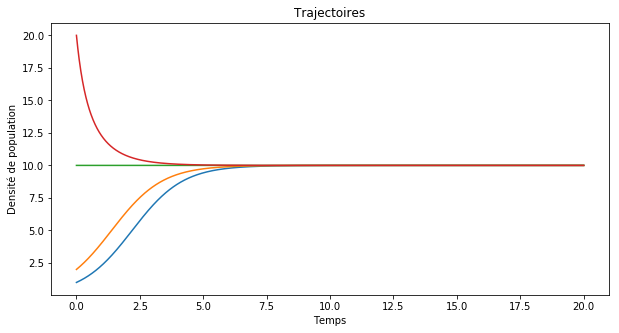

In [16]:
# Diffèrentes condtions initiales. 
# Remarquez que les trajectoires ne se coupent jamais. 
fig,ax = plt.subplots(1,1,figsize=(10,5))
for ci in (1,2,10,20):
    trajectoire = scipy.integrate.odeint(derivative,
                                         y0=ci,
                                         t=temps)
    ax.plot(temps,trajectoire)
ax.set(xlabel='Temps',ylabel='Densité de population', title='Trajectoires')
plt.show()

# Diagramme de Phase

Le diagramme de phase donne une représentation plus riche de notre modèle. 

Pour le construire, on place chacune des **variables d'état** sur un axe. En une dimension: c'est juste un axe et son intérêt est limité, on va tout de même le tracer en profitant du second axe pour représenter la valeur du flot. 

Ce diagramme peut être enrichi en ajoutant :

- des **trajectoires** (qui, dans l'espace des phases, sont des courbes paramétrées par le temps. On parle d'**orbites** ),
- le **flot** ou **champ de vecteur associé à dérivée temporelle** (ce qui donne un aperçu du comportement local en tout point). C'est surtout utile dans le cas des sytèmes **autonomes** (où la dérivée temporelle ne dépend pas du temps) comme Lotka-Volterra: Cela permet de représenter de manière synthétique toutes les trajectoires possibles ("il suffit de suivre les flèches"). 
- les **isoclines-zéros** (variétés où la dérivée d'une variable d'état s'annule),
- les **points d'équilibre** (points auxquels les isoclines zéros de toutes les variables d'état se croisent),
- les **bassin d'attraction** (région dans laquelle le comportement d'une trajectoire est conditionée par le point d'équilibre correspondant).

In [17]:
# Tracez le diagramme de phase en 1 dimension de la croissance logistique.

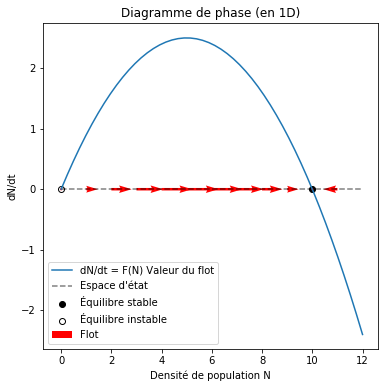

In [18]:
fig,ax = plt.subplots(1,1,figsize=(6,6))

Nspace = np.linspace(0,12)

plt.hlines(0,0,12,linestyles='--', alpha=.5, label="Espace d'état")
plt.plot(Nspace, derivative(Nspace,0), label='dN/dt = F(N) Valeur du flot')

# Placer les points d'équilibre
plt.scatter([K],[0], label='Équilibre stable', color='k')
plt.scatter([0],[0], label='Équilibre instable', color='w', edgecolors='k')

# Placer le flot
Ngrid = np.arange(12)
plt.quiver(Ngrid, [0]*len(Ngrid),  derivative(Ngrid,0), [0]*len(Ngrid), label='Flot', color='r')

# Configuration du diagramme
ax.set(xlabel='Densité de population N', ylabel='dN/dt', title='Diagramme de phase (en 1D)')
ax.legend();

# Diagramme de bifurcation

Le diagramme de bifurcation est une autre représentation du modèle. Il s'agit de tracer la **position et la nature des points d'équilibres en fonction de la valeur des paramètres**. On peut l'enrichir en ajoutant quelques trajectoires à titre d'illustration. 

Les **points de bifurcation** sont les points où la nature des points d'équilibre change (en général aux endroits où deux points d'équilibre entrent en collision). 

In [19]:
# Tracez le diagramme de bifurcation pour le paramètre de contrôle K. 

Les branches du diagramme de bifurcation sont les racines du flot.



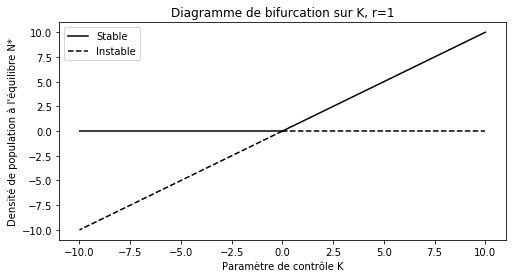

In [20]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

plt.plot([0,10],[0,10], ls='-', color='k', label='Stable')
plt.hlines(0, 0,10, linestyles='--', label='Instable')
plt.plot([0,-10],[0,-10], ls='--', color='k')
plt.hlines(0, 0,-10, linestyles='-')

ax.set(ylabel="Densité de population à l'équilibre N*", 
       xlabel='Paramètre de contrôle K',
       title='Diagramme de bifurcation sur K, r=1')
ax.legend();

# Passage à la seconde dimension

On ajoute une seconde espéce, et l'hypothèse H4 suivante

- *Hypthèse H4*: La compétition est linéaire et affecte le taux de mort de l'espèce 1 par un taux de compétition per capita constant $a_{2\to1}$ et  $a_{1\to2}$ respectivement.

Quelle est la nouvelle forme du système notée (S3) ? 




Première étape, on change l'espace d'état à $\mathbb N^2$

$$(S3) = \begin{cases} 
\frac{dN_1}{dt} = r_1N_1 (1 - \frac{N_1}{K_1})\\
\frac{dN_2}{dt} = r_2N_2(1 - \frac{N_2}{K_2})\\
\end{cases}$$

Deuxième étape, on ajoute le terme de compétition: 

$$(S4) = \begin{cases} 
\frac{dN_1}{dt} = r_1N_1 (1 - \frac{N_1}{K_1} - a_{2\to1}N_2)\\
\frac{dN_2}{dt} = r_2N_2(1 - \frac{N_2}{K_2} - a_{1\to2}N_1)\\
\end{cases}$$

En général on note $a_{1\to1} = K_1^{-1}$ et $a_{2\to2} = K_2^{-1}$, ainsi:

$$(S4) = \begin{cases} 
\frac{dN_1}{dt} = r_1N_1 (1 - a_{1\to1} N_1 - a_{2\to1}N_2)\\
\frac{dN_2}{dt} = r_2N_2(1 - a_{2\to2} N_2 - a_{1\to2}N_1)\\
\end{cases}$$

In [21]:
# Tracez les trajectoires du modèle de LV compétitif pour les trois jeux de paramètes et les deux conditions initiales.
# - Comme des séries temporelles
# - Comme des courbes paramétrées dans l'espace des phases

# Utilisez les jeux de paramètres suivants:
p1 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1,1.2],[1.2,1.5]], dtype=float)}
p2 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1,1.2],[1.5,1]], dtype=float)}
p3 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1.2,1],[1,1.5]], dtype=float)}
plist = (p1,p2,p3)

# Conditions initiales:
ci_1 = [.3,.5]
ci_2 = [.7,.2]
ci_list = [ci_1, ci_2]

# Temps
tspace = np.linspace(0,25,100)

In [22]:
def lotka_volterra(y,t,r,a):
    '''Flot du système de Lotka-Volterra
    Args: 
        y (np.array): Densités de populations,
        t (float): temps (non utilisé),
        r (np.array): Taux de croissance,
        a (np.array): matrice d'interaction,
    Retourne le flot du système de LV au point y. 
    '''
    # À compléter...

In [23]:
def lotka_volterra(y,t,r,a):
    '''Flot du système de Lotka-Volterra
    Args: 
        y (np.array): Densités de populations,
        t (float): temps (non utilisé),
        r (np.array): Taux de croissance,
        a (np.array): matrice d'interaction,
    Retourne le flot du système de LV au point y. 
    '''
    return r * y * (1-a@y)

In [24]:
# On peut afficher cette trajectoire en utilisant matplotlib. 
def trace_trajectoire(trajectoire, temps, labels=("Espèce 1", "Espèce 2"),
                      title='Trajectoire du Modèle de Lotka-Volterra', ax=None):
    """Trace la trajectoire du système sur ax.
    Args:
        trajectoire (np.array)
        temps (np,array)
        labels (Iterable)
        title (str)
        ax (matplotlib.axis)
    """
    # Si aucun axe n'est précisé on tracera sur l'axe "en cours". 
    if ax is None:
        ax = plt.gca()
    
    # Trace les lignes
    ax.plot(temps, trajectoire[:,0], label=labels[0])
    ax.plot(temps, trajectoire[:,1], label=labels[1])
    
    # Ajoute une légende correspondant aux labels des lignes.
    ax.legend()
    
    # Ajoute un titre aux axes. 
    ax.set_xlabel("Temps")
    ax.set_ylabel("Variables d'état")
    ax.set_title(title)

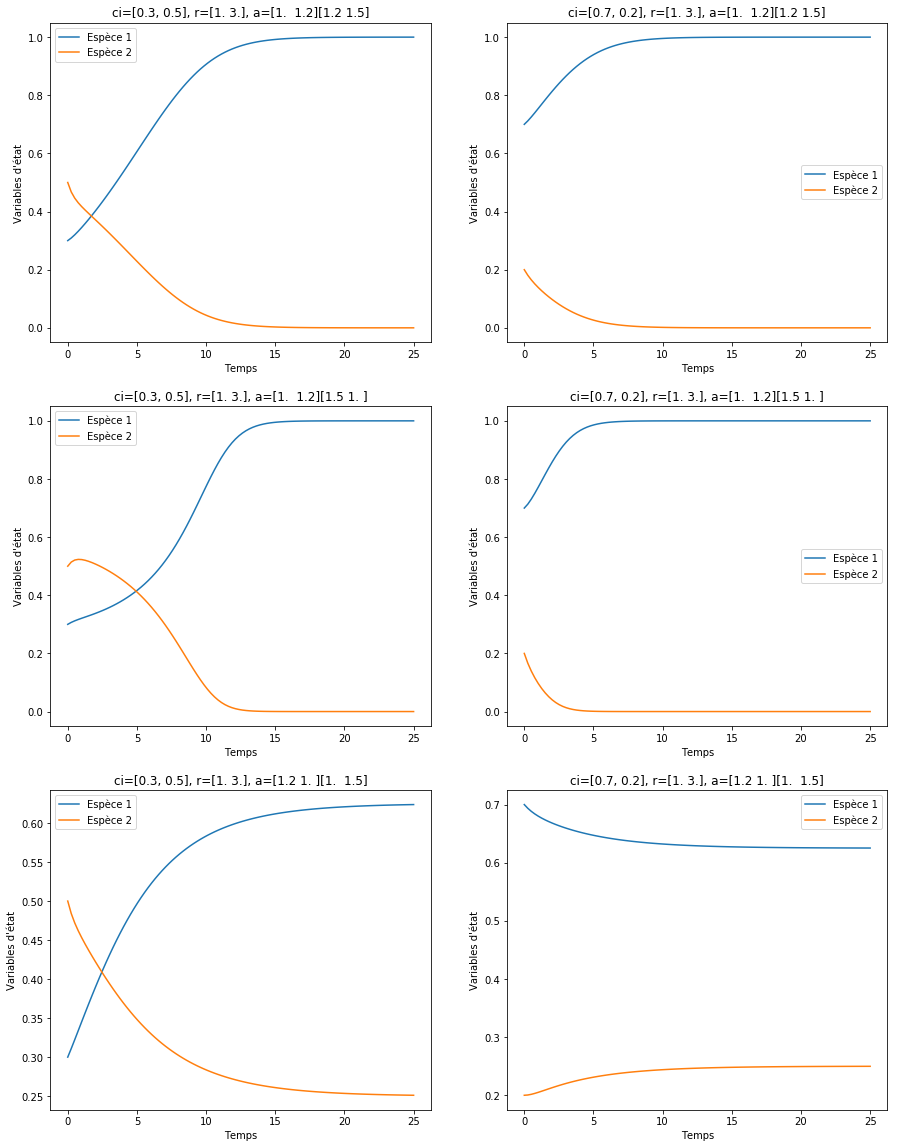

In [25]:
# Calculer les trajectoires...
trajectoires = [] 
for p in plist:
    flot = partial(lotka_volterra, **p)
    for ci in ci_list:
        tr = scipy.integrate.odeint(flot, ci, tspace)
        trajectoires.append((tr,p, ci))
        
# Tracer les trajectoires au cours du temps...
fig, axes = plt.subplots(3,2,figsize=(15,20))
for ax,(tr,p, ci) in zip(axes.flat, trajectoires):
    trace_trajectoire(tr, tspace,
                      ax=ax,
                      title="ci={}, r={}, a={}{}".format(ci, p['r'],p['a'][0],p['a'][1]))

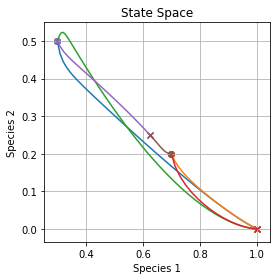

In [26]:
# Tracer les trajectoires dans l'espace des phases
fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.grid()
for (tr,p, ci) in trajectoires:
    l = ax.plot(tr[:,0],tr[:,1])
    ax.scatter(tr[0,0], tr[0,1], color=l[0].get_color(), marker='o')
    ax.scatter(tr[-1,0], tr[-1,1], color=l[0].get_color(), marker='x')

    ax.set(xlabel='Species 1',
           title="State Space".format(ci, p['r'],p['a'][0],p['a'][1]),
           ylabel='Species 2')
plt.tight_layout()

### La classification des équilibres en 2D 

Les systèmes linéaires en une dimension sont de la forme:

$$y' = f(y) = ky$$

Les équilibres sont les points $y^*$ où le flot est nul. L'ensemble des équilibre est $\{y^* \text{ tq. } f(y)= 0\} = \{0\}$. Les trajectoires sont de la forme $y(t) = y(0)e^{kt}$ Pour classer les équilibres, on regarde la dérivée du flot. 

Les équilibres sont: 

\begin{equation}
\begin{cases}
\textbf{Stables} &\text{ si } f'(y) = k < 0 \text{ (trajectoire} \to 0)\\
\textbf{Instables} &\text{ si } f'(y) = k > 0 \text{ (trajectoire} \to +\infty) \\
\textbf{Point selle} &\text{ si } f'(y) = k = 0 \text{ (trajectoire constante})
\end{cases}
\end{equation}

Les systèmes linéaires en deux dimensions sont de la forme:

$$y' = f(y) = Ay$$

Les équilibres sont les points $y^*$ où le flot est nul. L'ensemble des équilibre est encore $\{y^* \text{ tq. } f(y)= 0\} = \{0\}$. Les trajectoires sont de la forme $y(t) = y(0)e^{At}$. C'est à dire que si la matrice est diagonalisable tel que $A = P^{-1}DP$: 

\begin{equation}
e^{At} = P^{-1} \circ
\left [ \begin{array}{cc} e^{\lambda_0 t} & 0 \\
0 & e^{\lambda_1 t} \\
\end{array} \right ] \circ P
\end{equation}

Pour classer les équilibres, on regarde les valeurs propres de la jacobienne du flot: $\lambda_1,\lambda_2$.

\begin{equation}
\begin{cases}
\textbf{Nœud stable} &\text{ si } Im(\lambda_1) = Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)<0, Re(\lambda_2)<0\\
\textbf{Nœud instable} &\text{ si } Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)>0, Re(\lambda_2)>0  \\
\textbf{Point selle} &\text{ si } Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)Re(\lambda_2) < 0 \\
\textbf{Siprale stable} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0 \text{ et } Re(\lambda_1)<0, Re(\lambda_2)<0 \\
\textbf{Spirale instable} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0 \text{ et } Re(\lambda_1)>0, Re(\lambda_2)>0 \\
\textbf{Centre} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0  \text{ et } Re(\lambda_1) = Re(\lambda_2) = 0 \\
\end{cases}
\end{equation}

Quand on étudie des sytèmes non linéaires, on doit le faire localement, en remplaçant le flot par une approximation linéaire. On dit qu'on **linéarise** le flot $f$ autour de l'équilibre $y^*$.

$$f(y^*+h) = f(y^*) + h J_f y^* + o(h)$$ 

Où $J_f$ est la matrice Jacobienne de f.

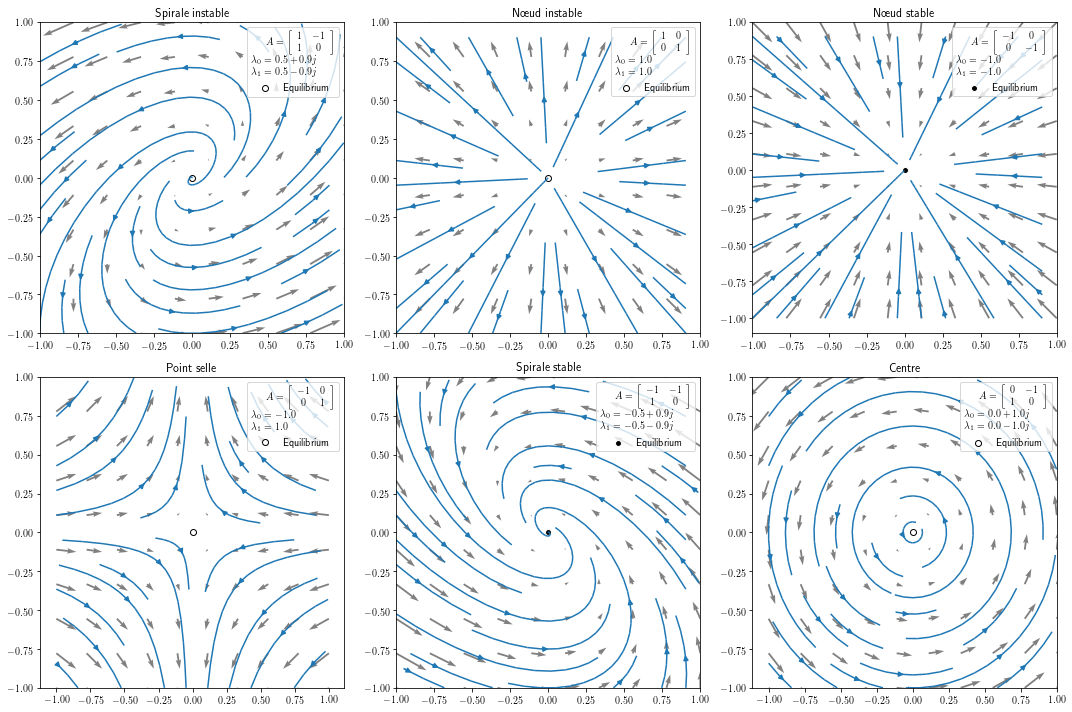

In [27]:
equilibria = {'Nœud instable': np.array([[1,0],[0,1]]),
              'Nœud stable': np.array([[-1,0],[0,-1]]),
              'Point selle': np.array([[-1,0],[0,1]]),
              'Centre': np.array([[0,-1],[1,0]]),
              'Spirale stable': np.array([[-1,-1],[1,0]]),
              'Spirale instable': np.array([[1,-1],[1,0]]),
             }
plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,3,figsize=(15,10))
for ax,(k,A) in zip(axes.flat, equilibria.items()):   
    
    #### Trace le flot en 2D ####  
    
    # np.meshgrid permet de 
    X,Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
    
    # np.vectorize permet de donner à une fonction quelquonque (ici le lambda)
    # des capacités de broadcasting (application à tous les éléments).
    # Par défaut vectorize attend une fonction qui prend des scalaires et retourne des scalaires.
    # Si ce n'est pas le cas il faut préciser la signature. Ici la fonction prend deux scalaires "(),()" et
    # retourne un array de taille 2 "->(2)"
    f = np.vectorize(lambda x,y: A@[x,y], signature='(),()->(2)')
    U = f(X,Y)    
    ax.quiver(X, Y, U[:,:,0], U[:,:,1], color='grey')
    ax.streamplot(X, Y, U[:,:,0], U[:,:,1], density=0.5)
    ### Flot tracé ####
    
    # Calcule les valeurs propres et les vecteurs propres de A.
    valp, vecp = np.linalg.eig(A)

    # Teste la stabilité de l'équilibre.
    stable = all(np.real(valp)<0)

    # Représente l'équilibre.
    ax.scatter(0, 0, 
               color='k' if stable else 'w',
               edgecolor = 'k' if not stable else 'w',
               label='Equilibrium')
    
    # Légende en latex. 
    # Nécessite d'avoir plt.rc('text', usetex=True)
    tex =  (r'$A = \left [ \begin{array}{cc}'
            + r"{0[0][0]:2} & {0[0][1]:2} \\ {0[1][0]:2} & {0[1][1]:2}".format(A) 
            + r'  \end{array} \right ]\\'
            + r'\lambda_0 = {0[0]:.1f} \\ \lambda_1 = {0[1]:.1f} $'.format(valp))
    ax.legend(title=tex, loc='upper right')
    ax.set(title=k)
plt.tight_layout()

In [28]:
# Trouvez les isoclines zero du modèle de Lotka-Volterra competitif
# Tracez le diagramme de phase pour les trois jeux de paramètres.
# Utilisez: plt.plot, plt.scatter, plt.streamplot, 
# En déduire les conditions de coexistance de deux espèces

In [29]:
def plot_template_lv(param, ax=None, quiver=True, color_eq=False):
    '''Plot the phase space of a LV system, with isoclines, equilibria and stability and
    derivative vector field'''
    
    if ax is None:
        plt.figure(figsize=(15,15))
        ax = plt.gca()
    
    # Champ de vecteurs. 
    if quiver:
        xmax = 1 if not (param['a']==0).any() else 10
        x = np.linspace(0,xmax,25)
        y = np.linspace(0,xmax,25)
        
        X,Y = np.meshgrid(x,y, indexing='ij')
        flot = lambda x,y:lotka_volterra(np.array([x,y]), 0 ,**param)
        
        f = np.vectorize(flot, signature='(),()->(2)')
        U = f(X,Y)
        norm = np.sqrt(U[:,:,0]**2+U[:,:,1]**2)
        ax.quiver(X, Y, U[:,:,0]/norm, U[:,:,1]/norm ,color='k', units='xy', angles='xy', alpha=.5)

    if not (param['a']==0).any():
        # Isoclines triviales
        mx = np.max(1/param['a'])
        ax.plot([0,mx],[0,0], color='r', ls='--',alpha=.5)
        ax.plot([0,0],[mx,0], color='b', ls='--',alpha=.5)

        # Isoclines non triviales 
        ax.plot([0,1/param['a'][0,0]], [1/param['a'][0,1],0], color='b', ls='--',alpha=.5)
        ax.plot([0,1/param['a'][1,0]],[1/param['a'][1,1],0], color='r', ls='--',alpha=.5)
        ax.text(1/param['a'][0,0], 0, r'$\frac{1}{a_{11}}$', color='b',
                horizontalalignment='center', verticalalignment='top')
        ax.text(0, 1/param['a'][0,1], r'$\frac{1}{a_{12}}$', color='b',
                horizontalalignment='right', verticalalignment='center')
        ax.text(1/param['a'][1,0], 0, r'$\frac{1}{a_{21}}$', color='r',
                horizontalalignment='center', verticalalignment='top')
        ax.text(0, 1/param['a'][1,1], r'$\frac{1}{a_{22}}$', color='r',
                horizontalalignment='right', verticalalignment='center')
    
    # Première bissectrice
    ax.plot([0,1],[0,1], color='k', ls='-.', alpha=.1)
    
    # Plot the equilibria. 
    det = np.linalg.det(param['a'])
    internal = np.array([(param['a'][1,1]-param['a'][0,1])/det, (param['a'][0,0]-param['a'][1,0])/det])
    equilibria = [[0,0], [0,1/param['a'][1,1]], [1/param['a'][0,0],0]]
    stability = [False, param['a'][0,1]>param['a'][1,1], param['a'][1,0]>param['a'][0,0] ]
    if all(internal>0):
        equilibria.append(internal)
        stability.append(not stability[-1])
        
    ax.set_xlabel('N1')
    ax.set_ylabel('N2')

    colors = ('blue','orange','green')
    stable_eq = [e for e,s in zip(equilibria, stability) if s]         
    for e,s in zip(equilibria, stability):
        if not s:
            ax.scatter(*e, color='w', edgecolor='k')
    for i,e in enumerate(stable_eq):
        if color_eq:
            ax.scatter(*e, color=colors[i])
        else:
            ax.scatter(*e, color='k')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


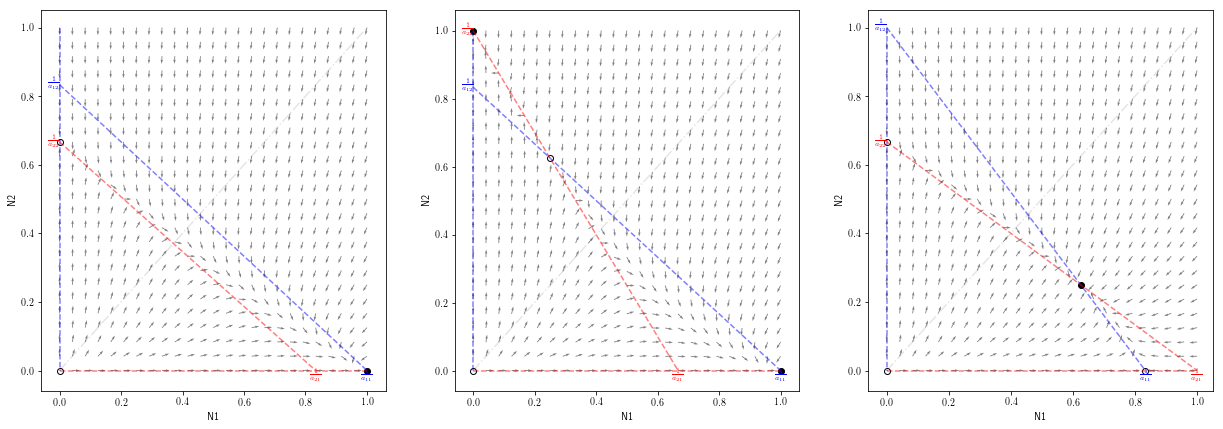

In [30]:
fig, axes = plt.subplots(1,3,figsize=(21,7))
for ax,p in zip(axes,plist):
    plot_template_lv(p,ax=ax)

# Modèle proie prédateur

- La cinétique est gouvernée par la **loi d'action de masse** (on imagine des individus bien mélangés, pas de saturation de la croissance ou de la prédation). 
- Les proies se reproduisent a un taux constant *per capita*: $b \; \text{proies}\times \text{secondes}^{-1}\times \text{proies}^{-1}$
- Les prédateurs meurent a un taux constant *per capita*: $d \; \text{prédateurs}\times \text{secondes}^{-1}\times \text{prédateurs}^{-1}$
- Les prédateurs ont besoin de se nourir pour pouvoir se reproduire. Les prédateurs font une prise de proie au taux : $a  \; \text{prédateur}\times \text{secondes}^{-1}$ et se reproduisent à un taux $c \; \text{proies}\times \text{secondes}^{-1}$. 

Ces hypothèses nous permettent de définir un **système dynamique**:

$$(S) = \begin{cases} 
\frac{dN}{dt} = bN - aNP \\
\frac{dP}{dt} = cNP - dP \\
\end{cases}$$

- La **trajectoire** du système est la suite $(N_t,P_t)_{t\in \mathbb R}$ qui désigne le nombre d'individus proies $N$ et prédateurs $P$ aux temps $t$ 

- Les **variables** d'état de ce modèle sont le temps, la population de proie et la population de prédateurs.

- Les **paramètres** de ce modèle sont les taux $(a,b,c,d)$.

In [31]:
# Montrez comment ce modèle est équivalent au précédent avec des paramètres r, a bien choisis. 
# Simulez ce modèle, tracez ses trajectoire comme des séries temporelles,
# puis comme des courbes paramétrées dans l'espace d'état
# Ajoutez les équilibres, les isoclines et le flot à l'espace d'état pour former le diagramme de phase.

params = [{"a":.01, "b":.02, "c":.01, "d":.02}, 
          {"a":.01, "b":.01, "c":.01, "d":.06}]
initial_conditions = [[3.6,2.1], [1.8,4]]
temps = np.linspace(0,1000,1500) 

In [32]:
def proie_predateur(b,d,a,c):
    """Convertit les paramètres du modèle proie-prédateur en paramètre du modèle général.
    Args:
        b: Taux de reproduction per capita des proies.
        d: Taux de décès per capita des prédateurs
        a: Taux de prédation des prédateurs sur les proies
        c: Taux de conversion de biomasse de proies en biomasse de prédateurs"""
    return {'r': np.array([b,-d]), 
            'a':np.array([[0,a/b],[-c/-d,0]])}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


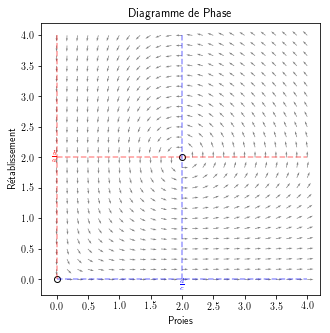

In [33]:
def trace_diagramme_de_phase_lv(a,b,c,d, xmax=None, ymax=None, quiver=True, ax=None):
    """Trace le squelette du diagramme de phase de Lotka-Volterra.
    
    Args:
        a,b,c,d (floats): Paramètres du modèle.
        xmax, ymax (floats): Limites du graphe. 
        quiver (bool): Si vrai, affiche le champ de vecteur
        ax (matplotlib axis): Axe sur lequel ajouter le diagramme.
    """
    
    # Configuration du plot. 
    if ax is None:
        fig = plt.figure(figsize=(5,5))
        ax = plt.gca()
        
    xmax = 2*d/c if xmax is None else xmax
    ymax = 2*b/a if ymax is None else ymax
    
    # Isoclines zéros.
    ax.hlines([0, b/a], 0, xmax, color=['b','r'], linestyles='--', alpha=.4)
    ax.vlines([0, d/c], 0, ymax, color=['r','b'], linestyles='--', alpha=.4)
    
    # Points d'équilibre. 
    ax.scatter(d/c,b/a, color='w', edgecolor='k',)
    ax.scatter(0,0, color='w', edgecolor='k',)

    # Text
    ax.text(d/c, 0, r'$\frac{d}{c}$', color='b',
            horizontalalignment='center', verticalalignment='top')
    ax.text(0, b/a, r'$\frac{b}{a}$', color='r',
            horizontalalignment='right', verticalalignment='center')
    
    # Axis labels
    ax.set_xlabel('Proies')
    ax.set_ylabel('Rétablissement')
    ax.set_title('Diagramme de Phase')

    # Champ de vecteur
    if quiver:
        x = np.linspace(0,xmax,25)
        y = np.linspace(0,ymax,25)
        
        X,Y = np.meshgrid(x,y, indexing='ij')
        flot = lambda x,y:lotka_volterra(np.array([x,y]), 0 ,**proie_predateur(a=a, b=b, c=c, d=d))
        
        f = np.vectorize(flot, signature='(),()->(2)')
        U = f(X,Y)
        norm = np.sqrt(U[:,:,0]**2+U[:,:,1]**2)
        ax.quiver(X, Y, U[:,:,0]/norm, U[:,:,1]/norm ,color='k', units='xy', angles='xy', alpha=.5)
    return ax

trace_diagramme_de_phase_lv(a=.01, b=.02, c=.01, d=.02, quiver=True)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


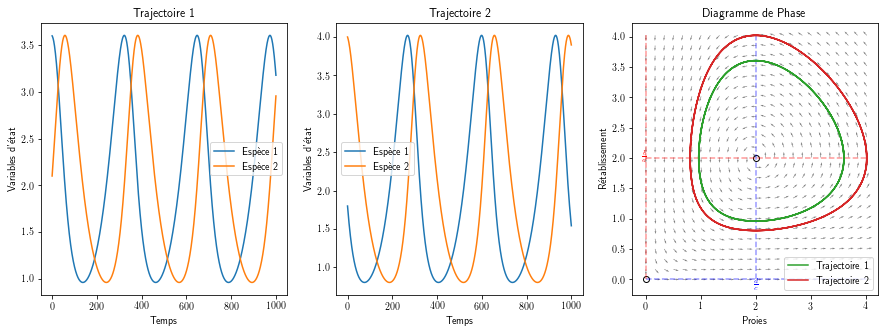

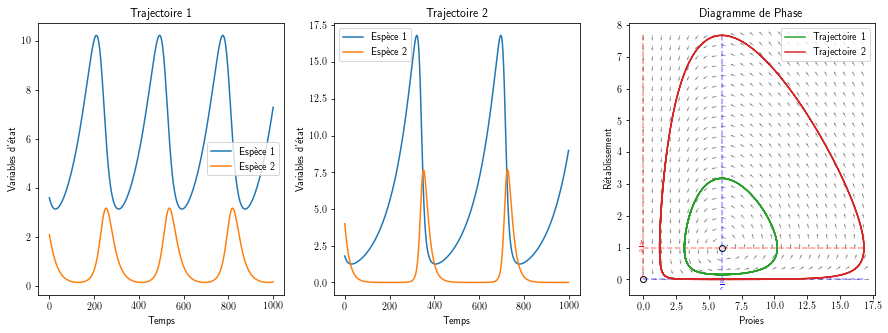

In [34]:

for p in params:
    plt.figure(figsize=(15,5))

    ax_phase = plt.subplot(1,3,3)
    for i, ic in enumerate(initial_conditions):
        ax = plt.subplot(1,3,i+1)
        trajectoire = scipy.integrate.odeint(partial(lotka_volterra, **proie_predateur(**p)),
                                             y0=ic,
                                             t=temps)
        label = 'Trajectoire {}'.format(i+1)
        trace_trajectoire(trajectoire,temps, ax=ax)
        ax.set_title(label)
        ax_phase.plot(*trajectoire.transpose(), color='C{}'.format(i+2), label=label)
    trace_diagramme_de_phase_lv(quiver=True,ax=ax_phase,
                                xmax=trajectoire[:,0].max(),
                                ymax=trajectoire[:,1].max(), **p)
    ax_phase.legend()
    plt.show()

# Une variante du modèle proie-prédateur
Le modèle que nous avons utilisé suppose que la croissance des proies est malthusienne. Que-se passe t-il si on relaxe cette hypothèse ?

Étudiez le modèle suivant:

\begin{equation}
(S) = \begin{cases}
\frac{dN}{dt} = bN(1-\frac{N}{K}) - aNP \\
\frac{dP}{dt} = cNP - dP \\
\end{cases}
\end{equation}

In [35]:
# Que signifie le nouveau paramètre ? Comment définir les paramètres r,k ? 
# Simulez-en quelques trajectoires. Quelle différences observez-vous ?
# Dessinez le diagramme de phase. Où sont les isoclines-zéro ? Où sont les équilibres ? Quelle est leur nature ?
# Faites varier c. Qu'observez vous ? Faites un diagramme de bifurcation. 

params = [{"a":.01, "b":.02, "c":.01, "d":.02, "K":10}, 
          {"a":.01, "b":.02, "c":.02, "d":.02, "K":10}]
initial_conditions = [[1,1], 
                      [1.8,4]]
temps = np.linspace(0,3000,1500) 

In [36]:
def proie_predateur_mod(b,d,a,c,K):
    """Convertit les paramètres du modèle proie-prédateur modifié en paramètre du modèle général.
    Args:
        b: Taux de reproduction per capita des proies.
        d: Taux de décès per capita des prédateurs
        a: Taux de prédation des prédateurs sur les proies
        c: Taux de conversion de biomasse de proies en biomasse de prédateurs
        K: capacité biotique des proies"""
    return {'r': np.array([b,-d]), 
            'a':np.array([[1/K,a/b],
                          [-c/-d,0]])}

In [37]:
def trace_diagramme_de_phase_lv_mod(a,b,c,d,K, xmax=None, ymax=None, quiver=True, ax=None):
    """Trace le squelette du diagramme de phase de Lotka-Volterra.
    
    Args:
        a,b,c,d (floats): Paramètres du modèle.
        xmax, ymax (floats): Limites du graphe. 
        quiver (bool): Si vrai, affiche le champ de vecteur
        ax (matplotlib axis): Axe sur lequel ajouter le diagramme.
    """
    
    # Configuration du plot. 
    if ax is None:
        fig = plt.figure(figsize=(5,5))
        ax = plt.gca()
        
    xmax = 4 if xmax is None else xmax
    ymax = 4 if ymax is None else ymax
    
    # Isoclines zéros.
    ax.hlines(0, 0, xmax, color=['b','r'], linestyles='--', alpha=.4)
    yspace = np.linspace(0,ymax)[1:]
    ax.plot(K*(1-(a/b)*yspace), yspace,color='r',ls='--', alpha=.4)
    ax.vlines([0, d/c], 0, ymax, color=['r','b'], linestyles='--', alpha=.4)
    
    # Points d'équilibre. 
    ax.scatter(d/c,(b/a)*(1-(d/(c*K))), 
               color='k' if c>d/K else 'w',
               edgecolor='w' if c>d/K else 'k',
               s=100)
    ax.scatter(0,0,
               color='w' if c>d/K else 'k',
               edgecolor='k' if c>d/K else 'w',
               s=100)

    # Text
    ax.text(d/c, 0, r'$\frac{d}{c}$', color='b',
            horizontalalignment='center', verticalalignment='top')
    ax.text(0, b/a, r'$\frac{b}{a}$', color='r',
            horizontalalignment='right', verticalalignment='center')
    
    # Axis labels
    ax.set_xlabel('Proies')
    ax.set_ylabel('Rétablissement')
    ax.set_title('Diagramme de Phase')

    # Champ de vecteur
    if quiver:
        x = np.linspace(0,xmax,25)
        y = np.linspace(0,ymax,25)
        
        X,Y = np.meshgrid(x,y, indexing='ij')
        flot = lambda x,y:lotka_volterra(np.array([x,y]), 0 ,**proie_predateur_mod(a=a, b=b, c=c, d=d, K=K))
        
        f = np.vectorize(flot, signature='(),()->(2)')
        U = f(X,Y)
        norm = np.sqrt(U[:,:,0]**2+U[:,:,1]**2)
        ax.quiver(X, Y, U[:,:,0]/norm, U[:,:,1]/norm ,color='k', units='xy', angles='xy', alpha=.5)
    ax.set(xlim=(-0.1,xmax),ylim=(-0.1,ymax))
    return ax

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


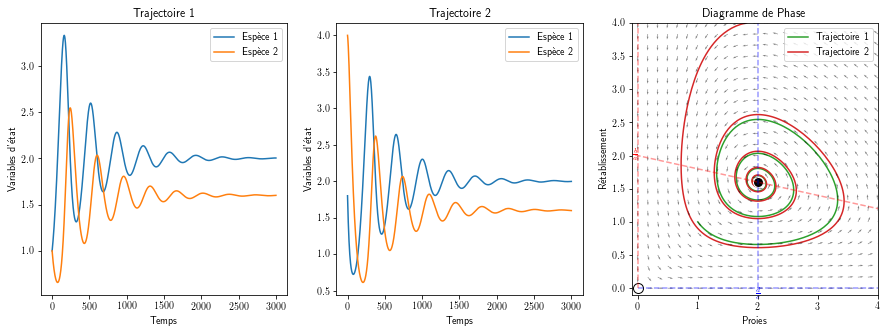

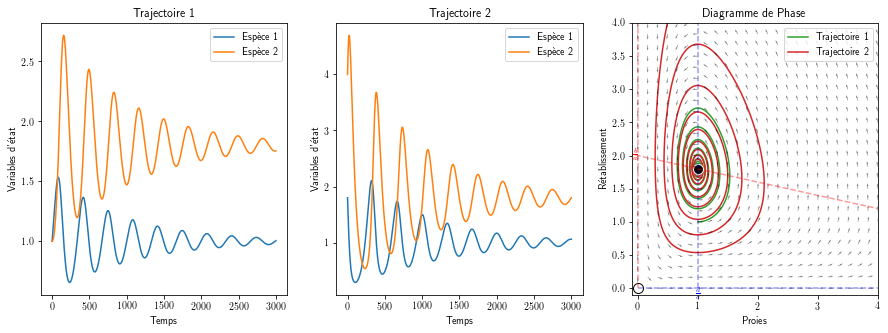

In [38]:
for p in params:
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    for i, (ax,ic) in enumerate(zip(axes[:2],initial_conditions)):
        trajectoire = scipy.integrate.odeint(partial(lotka_volterra, **proie_predateur_mod(**p)),
                                             y0=ic,
                                             t=temps)
        label = 'Trajectoire {}'.format(i+1)
        trace_trajectoire(trajectoire,temps, ax=ax)
        ax.set_title(label)
        axes[2].plot(*trajectoire.transpose(),
                     color='C{}'.format(i+2),  
                     label=label, zorder=-99)
    trace_diagramme_de_phase_lv_mod(quiver=True, ax=axes[2], **p)
    axes[2].legend()
    plt.show()

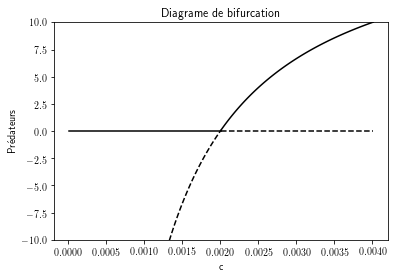

In [39]:
def trace_bifurcation_lvm(a,b,d,K):
    low = np.linspace(0,d/K,100)+1e-5
    high = np.linspace(d/K,2*d/K,100)+1e-5
    
    position_eq = lambda c: (b/a)*(1-(d/(c*K)))
    
    plt.plot(low,[0]*len(low),ls='-',color='k')
    plt.plot(high,[0]*len(high),ls='--',color='k')
    plt.plot(low,position_eq(low),ls='--',color='k')
    plt.plot(high,position_eq(high),ls='-',color='k')
    plt.ylim(-10,10)
    plt.xlabel('c')
    plt.ylabel('Prédateurs')
    plt.title('Diagrame de bifurcation')

trace_bifurcation_lvm(a=.01, b=0.2, d=0.02, K=10)